<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_6_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Library yang akan digunakan

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [3]:
imgLena = cv.imread('/content/gdrive/MyDrive/PCVK/lena.jpg')

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

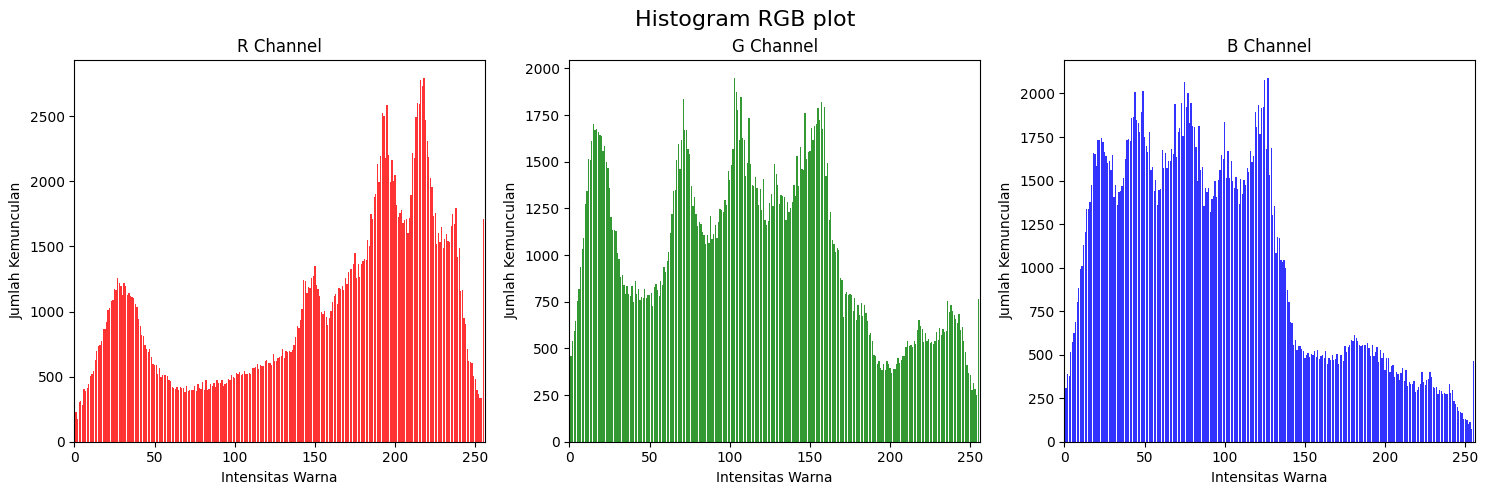

In [4]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot', fontsize=16)

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), histogram.ravel(), color=color, alpha=0.8)
    plt.title(f'{color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


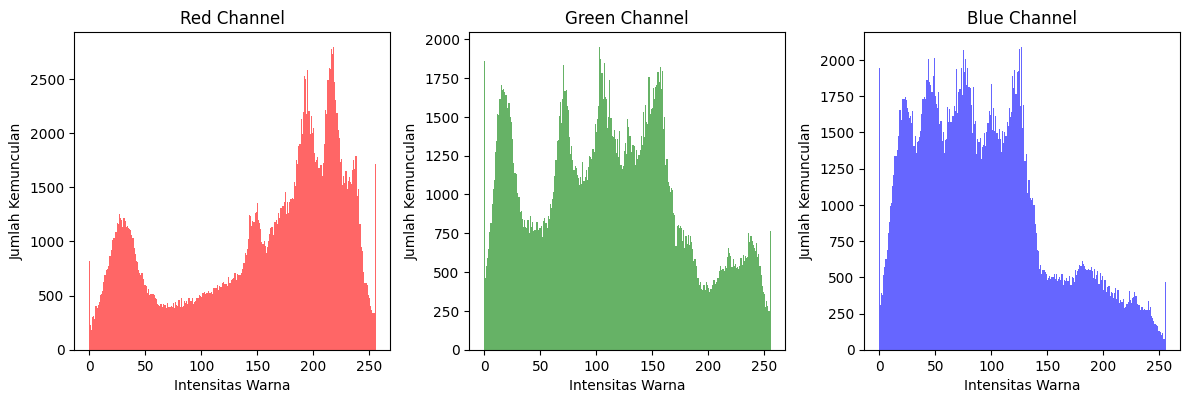

In [18]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan channel warna
red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# Membuat histogram RGB dengan np.histogram
red_hist_np, red_bins_np = np.histogram(red_channel, bins=256, range=(0, 256))
green_hist_np, green_bins_np = np.histogram(green_channel, bins=256, range=(0, 256))
blue_hist_np, blue_bins_np = np.histogram(blue_channel, bins=256, range=(0, 256))

# Buat layout
plt.figure(figsize=(12, 8))

# Membuat histogram untuk masing-masing channel warna
plt.subplot(231)
plt.bar(red_bins_np[:-1], red_hist_np, color='red', alpha=0.6, width=1)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(232)
plt.bar(green_bins_np[:-1], green_hist_np, color='green', alpha=0.6, width=1)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(233)
plt.bar(blue_bins_np[:-1], blue_hist_np, color='blue', alpha=0.6, width=1)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [6]:
imgLenalc = cv.imread('/content/gdrive/MyDrive/PCVK/lena_lc.jpg')

<ipython-input-33-83b8c9c920ef>:101: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


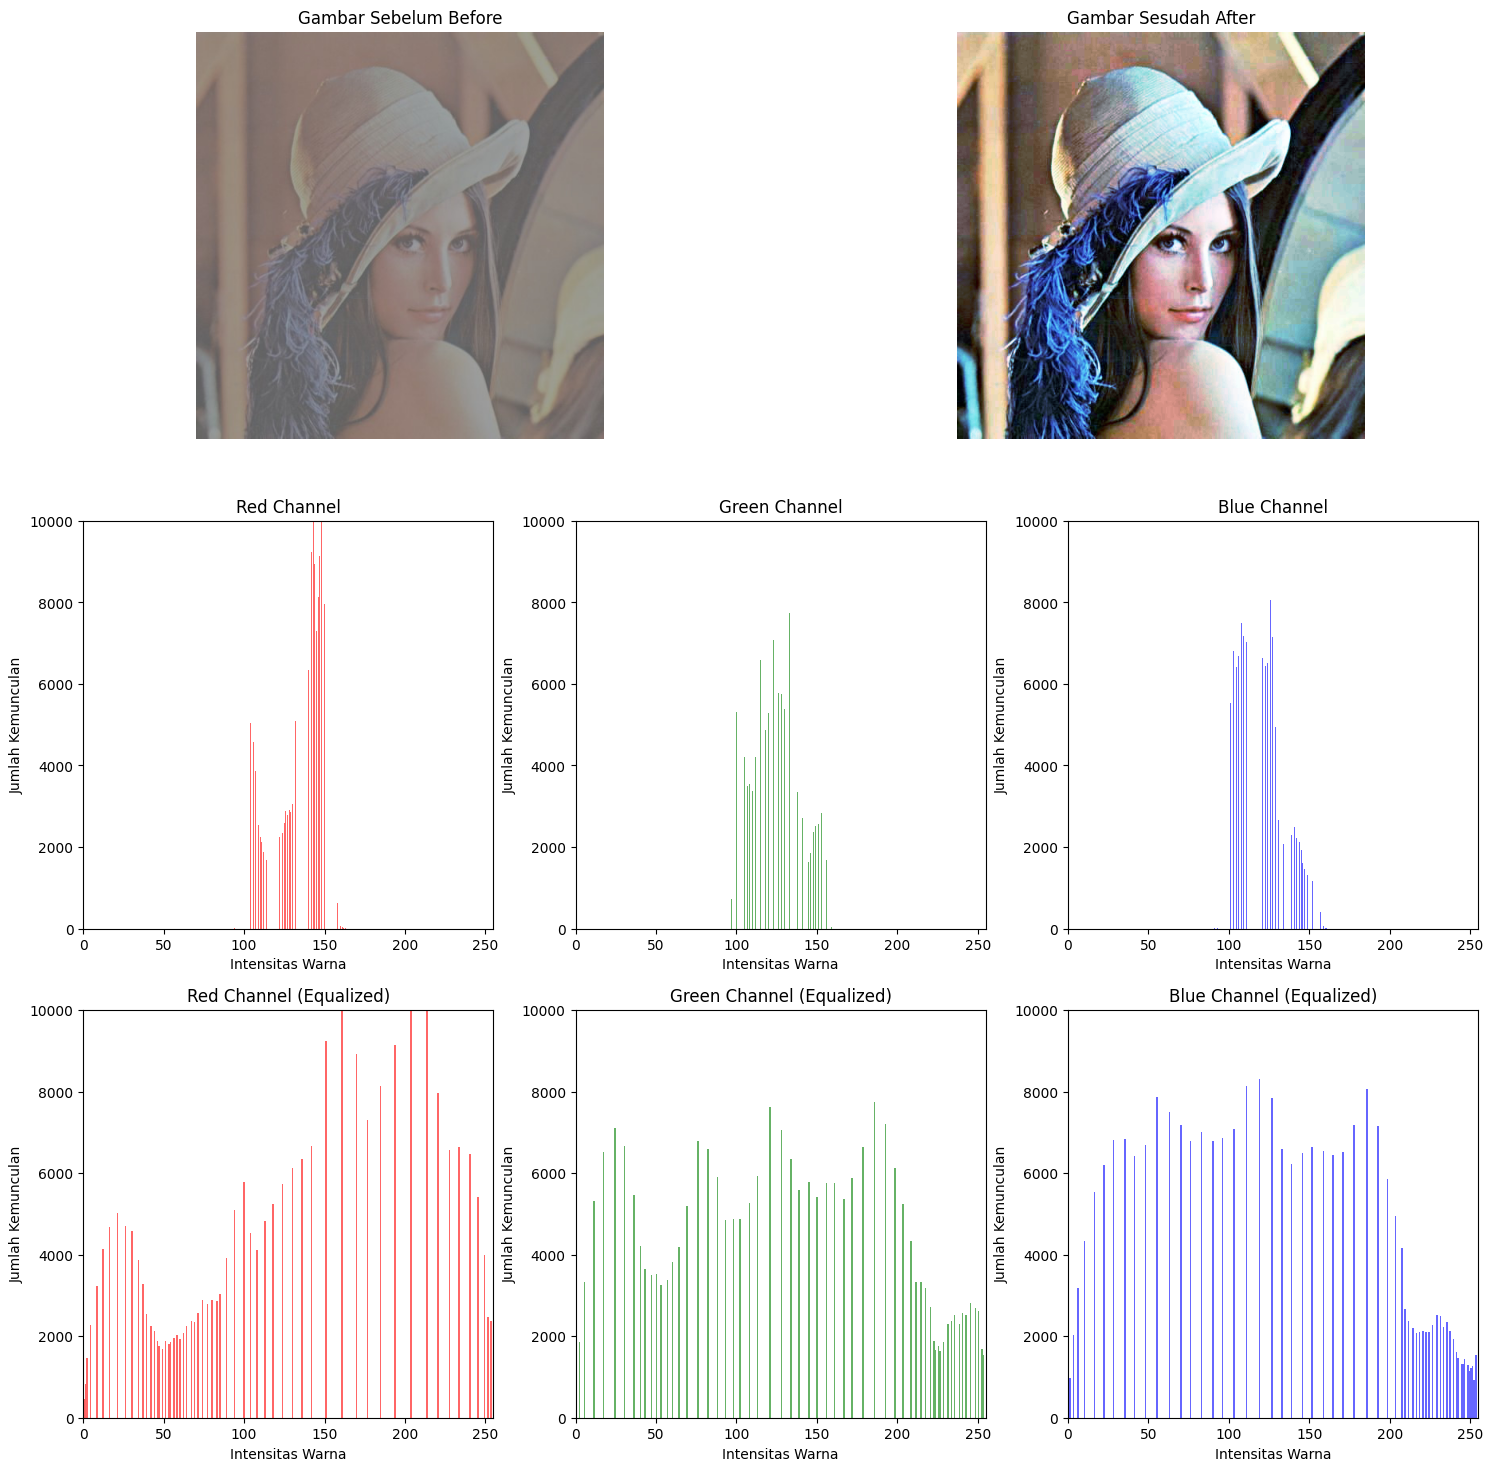

In [33]:
img = imgLenalc.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menghitung jumlah kemunculan tiap pixel warna
red_hist, red_bins = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_hist, green_bins = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_hist, blue_bins = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# Menghitung penjumlahan kumulatif dari frekuensi
red_cumulative_frequency = np.cumsum(red_hist)
green_cumulative_frequency = np.cumsum(green_hist)
blue_cumulative_frequency = np.cumsum(blue_hist)

# Normalisasi kumulatif frekuensi
num_pixels = img.shape[0] * img.shape[1]
red_normalized_frequency = (red_cumulative_frequency / num_pixels) * 255
green_normalized_frequency = (green_cumulative_frequency / num_pixels) * 255
blue_normalized_frequency = (blue_cumulative_frequency / num_pixels) * 255

# Implementasi rumus histogram equalization
red_equalized_image = red_normalized_frequency[img[:, :, 0]]
green_equalized_image = green_normalized_frequency[img[:, :, 1]]
blue_equalized_image = blue_normalized_frequency[img[:, :, 2]]

# Membangun citra hasil histogram equalization
equalized_img = np.zeros_like(img)
equalized_img[:, :, 0] = red_equalized_image.astype(np.uint8) # .astype(np.uint8) untuk konversi ke data yang benar
equalized_img[:, :, 1] = green_equalized_image.astype(np.uint8)
equalized_img[:, :, 2] = blue_equalized_image.astype(np.uint8)

# Menampilkan hasil
plt.figure(figsize=(18,18))

# Menampilkan gambar sebelum before dan sesudah after
plt.subplot(321)
plt.imshow(img)
plt.axis('off')
plt.title('Gambar Sebelum Before')

plt.subplot(322)
plt.imshow(equalized_img)
plt.axis('off')
plt.title('Gambar Sesudah After')

# Histogram untuk gambar asli
plt.subplot(334)
plt.hist(img[:, :, 0].ravel(), bins=256, color="red", alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(335)
plt.hist(img[:, :, 1].ravel(), bins=256, color="green", alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(336)
plt.hist(img[:, :, 2].ravel(), bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

# Histogram untuk gambar equalization
plt.subplot(337)
plt.hist(equalized_img[:, :, 0].ravel(), bins=256, color="red", alpha=0.6)
plt.title('Red Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(338)
plt.hist(equalized_img[:, :, 1].ravel(), bins=256, color="green", alpha=0.6)
plt.title('Green Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(339)
plt.hist(equalized_img[:, :, 2].ravel(), bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.tight_layout()
plt.show()

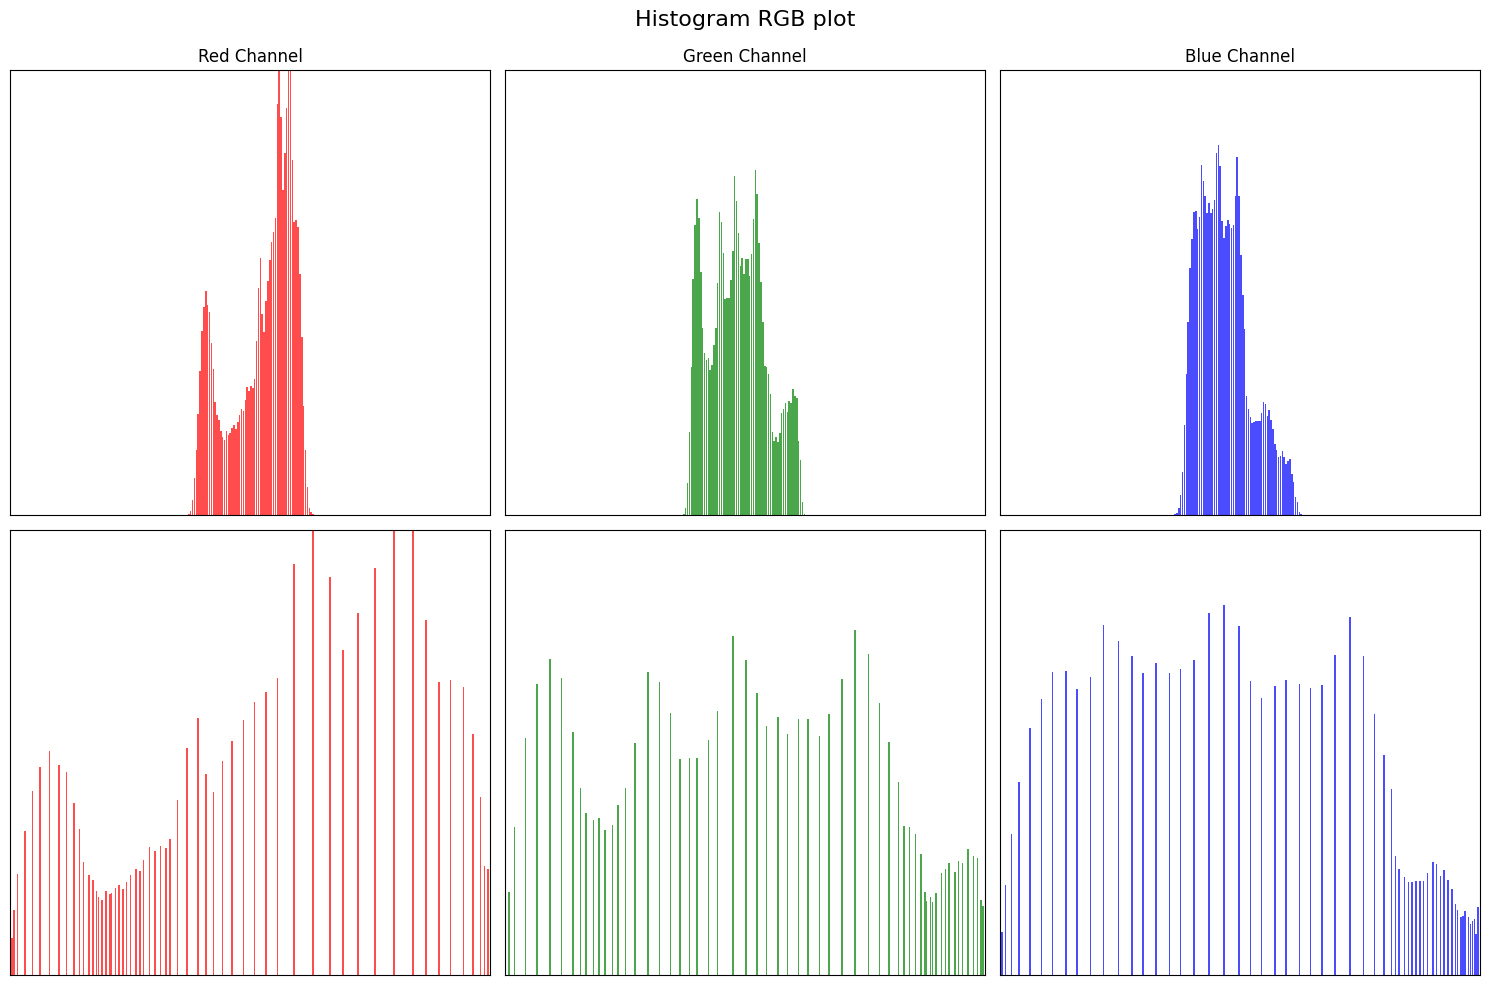

In [34]:
img = imgLenalc.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def plot_rgb_histograms(img, equalized_img):
    plt.figure(figsize=(15, 10))
    plt.suptitle('Histogram RGB plot', fontsize=16)

    channels = ['Red', 'Green', 'Blue']
    colors = ['red', 'green', 'blue']

    for i, (channel, color) in enumerate(zip(channels, colors)):
        # Original histogram
        plt.subplot(2, 3, i+1)
        hist, _ = np.histogram(img[:,:,i].ravel(), bins=256, range=[0, 256])
        plt.bar(range(256), hist, color=color, alpha=0.7)
        plt.title(f'{channel} Channel')
        plt.xlim(0, 255)
        plt.ylim(0, 10000)
        plt.xticks([])
        plt.yticks([])

        # Equalized histogram
        plt.subplot(2, 3, i+4)
        hist, _ = np.histogram(equalized_img[:,:,i].ravel(), bins=256, range=[0, 256])
        plt.bar(range(256), hist, color=color, alpha=0.7)
        plt.xlim(0, 255)
        plt.ylim(0, 10000)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Assuming img and equalized_img are already defined
plot_rgb_histograms(img, equalized_img)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!